In [1]:
import itertools
import random
import matplotlib.pyplot as plt
import torchvision
import torch
import torch.utils.data
import torch.nn as nn
import numpy as np

from typing import Any
from scipy.stats import norm
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms

from src.py.models.vae import learn
from src.py.models.vae import Autoencoder
from src.py.utils.digit_plotting import plot_digits

In [2]:
DATA_PATH = "../../data"
BATCH_SIZE = 10
DIGIT_SIZE = 28

In [3]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
train_data = torchvision.datasets.MNIST(DATA_PATH, transform=trans, train=True, download=True)
test_data = torchvision.datasets.MNIST(DATA_PATH, transform=trans, train=False, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE)


In [4]:
with SummaryWriter(log_dir="../../runs/vae", purge_step=0) as writer:
    vae = Autoencoder(writer)
    vae = learn(vae, train_loader, 1)
        

In [5]:
def plot_result_random_example_batch_from_head(head_size=100):
    X, y = random.sample(list(itertools.islice(iter(train_loader), 
                                               None, head_size)), 1)[0]

    r = vae.auto_encoder(X)
    plot_digits(X)
    plot_digits(r)

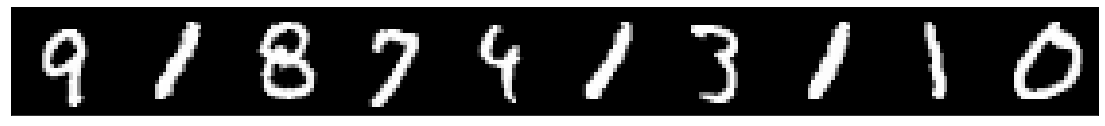

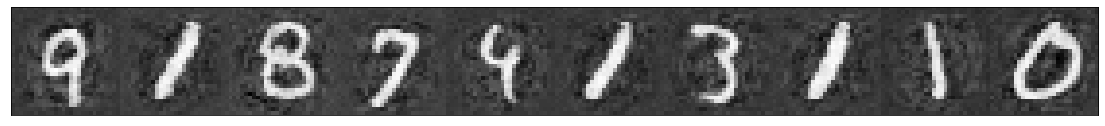

In [6]:
plot_result_random_example_batch_from_head()